## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128],l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    out = keras.layers.Dense(units=output_units,activation="softmax",name="output")(x)
    model = keras.models.Model(inputs=[input_layer],output=[out])
            
    return model

In [6]:
"""Code Here
設定超參數
"""
LearningRate=1e-3
Epochs=50
BatchSize=256
Momentum=0.95
L2_exp=[1e-2,1e-4,1e-8,1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_exp:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f"%(regulizer_ratio))
    model=build_mlp(input_shape=x_train.shape[1:],l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LearningRate, nesterov=True, momentum=Momentum)
    model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
    model.fit(x_train,y_train,
              epochs=Epochs,
              batch_size=BatchSize,
              validation_data=(x_test,y_test),
              shuffle=True)
    train_loss=model.history.history["loss"]
    valid_loss=model.history.history["val_loss"]
    train_acc=model.history.history["acc"]
    valid_acc=model.history.history["val_acc"]
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\jim60\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 288us/step - loss: 15.0966 - acc: 0.2765 - val_loss: 13.9625 - val_acc: 0.3467
Epoch 2/50
50000/50000 [==============================] - 12s 246us/step - loss: 13.0232 - acc: 0.3615 - val_loss: 12.1283 - val_acc: 0.3761
Epoch 3/50
50000/50000 [==============================] - 13s 260us/step - loss: 11.3502 - acc: 0.3831 - val_loss: 10.6011 - val_acc: 0.3954
Epoch 4/50
50000/50000 [==============================] - 12s 243us/step - loss: 9.9377 - acc: 0.3990 - val_loss: 9.3005 - val_acc: 0.4013
Epoch 5/50
50000/50000 [==============================] - 11s 224us/step - loss: 8.7364 - acc: 0.4080 - val_loss: 8.1990 - val_acc: 0.4059
Epoch 6/50
50000/50000 [==============================] - 11s 218us/step - loss: 7.7125 - acc: 0.4147 - val_loss: 7.2509 - val_acc: 0.4162
Epoch 7/50
50000/50000 [==============================] - 11s 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.1742 - acc: 0.2756 - val_loss: 2.0039 - val_acc: 0.3459
Epoch 2/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.9430 - acc: 0.3715 - val_loss: 1.9069 - val_acc: 0.3800
Epoch 3/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.8577 - acc: 0.4009 - val_loss: 1.8355 - val_acc: 0.4122
Epoch 4/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.7998 - acc: 0.4207 - val_loss: 1.7812 - val_acc: 0.4254
Epoch 5/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.7525 - acc: 0.4370 - val_loss: 1.7565 - val_acc: 0.4366
Epoch 6/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.7150 - acc: 0.4487 - val_loss: 1.7040 - val_acc: 0.4468
Epoch 7/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6817 - acc: 0.4602 - val_loss: 1.

50000/50000 [==============================] - 11s 220us/step - loss: 2.0492 - acc: 0.2706 - val_loss: 1.8819 - val_acc: 0.3364
Epoch 2/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.8202 - acc: 0.3602 - val_loss: 1.7694 - val_acc: 0.3815
Epoch 3/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.7323 - acc: 0.3919 - val_loss: 1.7048 - val_acc: 0.3985
Epoch 4/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.6730 - acc: 0.4122 - val_loss: 1.6610 - val_acc: 0.4158
Epoch 5/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.6260 - acc: 0.4306 - val_loss: 1.6235 - val_acc: 0.4294
Epoch 6/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.5865 - acc: 0.4428 - val_loss: 1.5772 - val_acc: 0.4429
Epoch 7/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.5508 - acc: 0.4558 - val_loss: 1.5546 - val_acc: 0.4514
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.8190 - acc: 0.3622 - val_loss: 1.7714 - val_acc: 0.3779
Epoch 3/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.7338 - acc: 0.3929 - val_loss: 1.7015 - val_acc: 0.4031
Epoch 4/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.6750 - acc: 0.4142 - val_loss: 1.6544 - val_acc: 0.4125
Epoch 5/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.6291 - acc: 0.4295 - val_loss: 1.6188 - val_acc: 0.4270
Epoch 6/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.5907 - acc: 0.4434 - val_loss: 1.5823 - val_acc: 0.4452
Epoch 7/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.5583 - acc: 0.4560 - val_loss: 1.5560 - val_acc: 0.4482
Epoch 8/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.5302 - acc: 0.4641 - val_loss: 1.5435 - val_acc: 0.4562
Epoch 9/50
50000/50000 [===

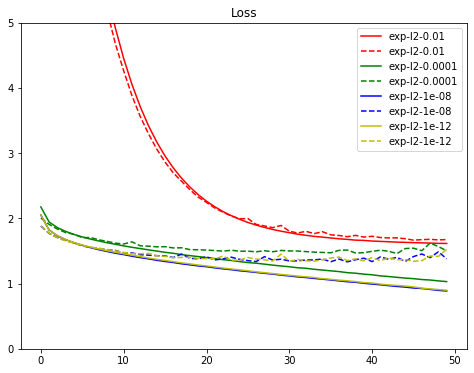

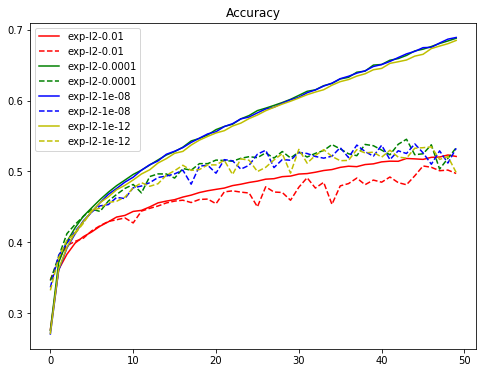

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp2(input_shape,output_units=10,num_neurons=[512,256,128],l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurons):
        if i==0:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    out = keras.layers.Dense(units=output_units,activation="softmax",name="output")(x)
    model = keras.models.Model(inputs=[input_layer],output=[out])
            
    return model

In [10]:
results2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_exp:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f"%(regulizer_ratio))
    model=build_mlp(input_shape=x_train.shape[1:],l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LearningRate, nesterov=True, momentum=Momentum)
    model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
    model.fit(x_train,y_train,
              epochs=Epochs,
              batch_size=BatchSize,
              validation_data=(x_test,y_test),
              shuffle=True)
    train_loss=model.history.history["loss"]
    valid_loss=model.history.history["val_loss"]
    train_acc=model.history.history["acc"]
    valid_acc=model.history.history["val_acc"]
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\jim60\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 223us/step - loss: 15.0915 - acc: 0.2647 - val_loss: 13.9655 - val_acc: 0.3344
Epoch 2/50
50000/50000 [==============================] - 10s 206us/step - loss: 13.0306 - acc: 0.3539 - val_loss: 12.1362 - val_acc: 0.3744
Epoch 3/50
50000/50000 [==============================] - 10s 205us/step - loss: 11.3565 - acc: 0.3773 - val_loss: 10.6028 - val_acc: 0.3893
Epoch 4/50
50000/50000 [==============================] - 10s 206us/step - loss: 9.9414 - acc: 0.3923 - val_loss: 9.3009 - val_acc: 0.4025
Epoch 5/50
50000/50000 [==============================] - 10s 205us/step - loss: 8.7403 - acc: 0.4039 - val_loss: 8.2002 - val_acc: 0.4029
Epoch 6/50
50000/50000 [==============================] - 10s 203us/step - loss: 7.7176 - acc: 0.4102 - val_loss: 7.2523 - val_acc: 0.4142
Epoch 7/50
50000/50000 [==============================] - 10s 203us/step - loss: 6.8440 - acc: 0.4180 - val_lo

50000/50000 [==============================] - 11s 218us/step - loss: 2.1741 - acc: 0.2731 - val_loss: 2.0003 - val_acc: 0.3408
Epoch 2/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.9366 - acc: 0.3667 - val_loss: 1.8889 - val_acc: 0.3796
Epoch 3/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.8570 - acc: 0.3921 - val_loss: 1.8239 - val_acc: 0.4071
Epoch 4/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.7999 - acc: 0.4142 - val_loss: 1.7765 - val_acc: 0.4272
Epoch 5/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.7537 - acc: 0.4321 - val_loss: 1.7419 - val_acc: 0.4306
Epoch 6/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.7144 - acc: 0.4452 - val_loss: 1.7113 - val_acc: 0.4481
Epoch 7/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6806 - acc: 0.4573 - val_loss: 1.6839 - val_acc: 0.4548
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.8030 - acc: 0.3688 - val_loss: 1.7497 - val_acc: 0.3932
Epoch 3/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.7230 - acc: 0.3985 - val_loss: 1.7003 - val_acc: 0.4029
Epoch 4/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6676 - acc: 0.4175 - val_loss: 1.6446 - val_acc: 0.4257
Epoch 5/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.6203 - acc: 0.4330 - val_loss: 1.6091 - val_acc: 0.4319
Epoch 6/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.5819 - acc: 0.4465 - val_loss: 1.5837 - val_acc: 0.4473
Epoch 7/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.5476 - acc: 0.4581 - val_loss: 1.5549 - val_acc: 0.4522
Epoch 8/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.5177 - acc: 0.4674 - val_loss: 1.5323 - val_acc: 0.4531
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.7115 - acc: 0.4018 - val_loss: 1.6778 - val_acc: 0.4133
Epoch 4/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.6528 - acc: 0.4212 - val_loss: 1.6293 - val_acc: 0.4244
Epoch 5/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.6036 - acc: 0.4393 - val_loss: 1.6170 - val_acc: 0.4247
Epoch 6/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.5656 - acc: 0.4526 - val_loss: 1.5599 - val_acc: 0.4519
Epoch 7/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.5316 - acc: 0.4648 - val_loss: 1.5396 - val_acc: 0.4515
Epoch 8/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.5011 - acc: 0.4741 - val_loss: 1.5162 - val_acc: 0.4655
Epoch 9/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.4727 - acc: 0.4836 - val_loss: 1.5013 - val_acc: 0.4559
Epoch 10/50
50000/50000 [==

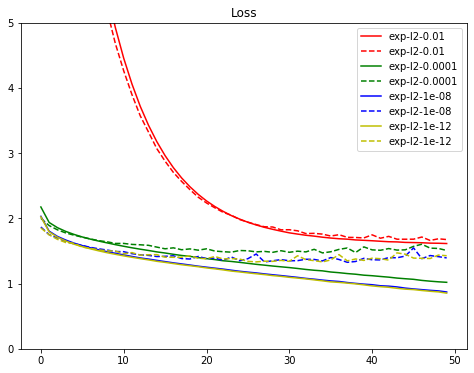

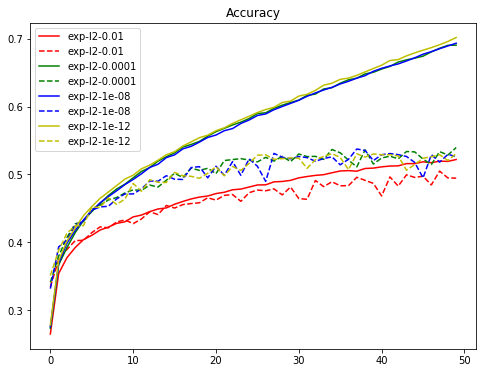

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()